In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Arbol de decision para especies de flores

In [2]:
df = pd.read_csv("../../python-ml-course-master/datasets/iris/iris.csv")
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.shape

(150, 5)

([array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0.

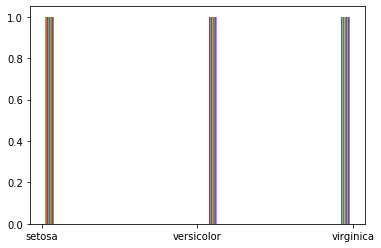

In [4]:
plt.hist(df.Species)

In [5]:
df.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
col_names = df.columns.values.tolist()
col_names

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species']

In [7]:
predictors = col_names[:4]
target = col_names[4]

In [8]:
df["is_train"] = np.random.uniform(0,1,len(df))<0.75

In [9]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,is_train
0,5.1,3.5,1.4,0.2,setosa,True
1,4.9,3.0,1.4,0.2,setosa,True
2,4.7,3.2,1.3,0.2,setosa,False
3,4.6,3.1,1.5,0.2,setosa,False
4,5.0,3.6,1.4,0.2,setosa,True


(array([ 43.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 107.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float16),
 <a list of 10 Patch objects>)

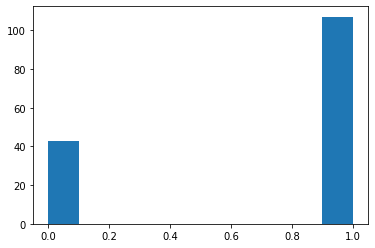

In [10]:
plt.hist(df.is_train.astype(np.float16))

In [11]:
train, test = df[df["is_train"]==True],df[df["is_train"]==False]

In [12]:
len(train), len(test)

(107, 43)

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
tree = DecisionTreeClassifier(criterion="entropy", min_samples_split=20,random_state=99)
tree.fit(train[predictors],train[target])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=99, splitter='best')

In [15]:
preds = tree.predict(test[predictors])

In [16]:
pd.crosstab(test[target], preds, rownames=["Actual"],colnames=["Predictions"])

Predictions,setosa,versicolor,virginica
Actual,,,
setosa,15,0,0
versicolor,0,18,0
virginica,0,1,9


In [17]:
tree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=99, splitter='best')

# El tratamiento de ficheros dot

### Para poder vizualizar hay que generar un archivo .dot

In [18]:
from sklearn.tree import export_graphviz

In [19]:
with open("S10 Arboles y bosques Aleatorios - C144 El tratamiento de ficheros dot.dot", "w") as dotfile:
    export_graphviz(tree,out_file=dotfile,feature_names=predictors)
    dotfile.close()

In [20]:
import os 
from graphviz import Source

In [21]:
file = open("S10 Arboles y bosques Aleatorios - C144 El tratamiento de ficheros dot.dot", "r")
text = file.read()
text

'digraph Tree {\nnode [shape=box] ;\n0 [label="Petal.Length <= 2.45\\nentropy = 1.579\\nsamples = 107\\nvalue = [35, 32, 40]"] ;\n1 [label="entropy = 0.0\\nsamples = 35\\nvalue = [35, 0, 0]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Petal.Width <= 1.75\\nentropy = 0.991\\nsamples = 72\\nvalue = [0, 32, 40]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="Petal.Length <= 5.05\\nentropy = 0.431\\nsamples = 34\\nvalue = [0, 31, 3]"] ;\n2 -> 3 ;\n4 [label="Sepal.Length <= 5.0\\nentropy = 0.206\\nsamples = 31\\nvalue = [0, 30, 1]"] ;\n3 -> 4 ;\n5 [label="entropy = 1.0\\nsamples = 2\\nvalue = [0, 1, 1]"] ;\n4 -> 5 ;\n6 [label="entropy = 0.0\\nsamples = 29\\nvalue = [0, 29, 0]"] ;\n4 -> 6 ;\n7 [label="entropy = 0.918\\nsamples = 3\\nvalue = [0, 1, 2]"] ;\n3 -> 7 ;\n8 [label="Petal.Length <= 4.85\\nentropy = 0.176\\nsamples = 38\\nvalue = [0, 1, 37]"] ;\n2 -> 8 ;\n9 [label="entropy = 0.918\\nsamples = 3\\nvalue = [0, 1, 2]"] ;\n

In [27]:
os.environ["PATH"] += os.pathsep + "C:/Anaconda3/pkgs/graphviz-2.38-hfd603c8_2/Library/bin/graphviz/"

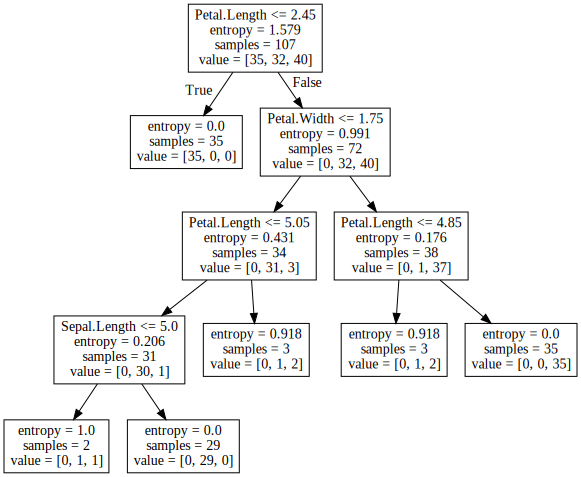

In [28]:
Source(text)